In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

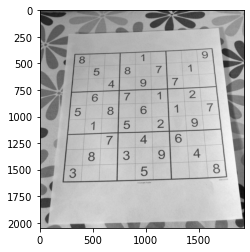

In [2]:
img = cv2.imread("img/sudoku1.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

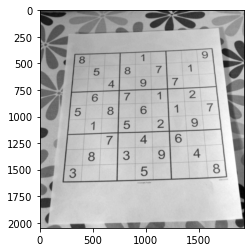

In [3]:
img_blur = cv2.GaussianBlur(img_gray,(7,7),3)
plt.imshow(img_blur,cmap="gray")

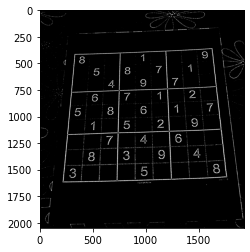

In [4]:
img_thresh = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,2)
plt.imshow(img_thresh,cmap="gray")

In [5]:
contours,_ = cv2.findContours(img_thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [6]:
contours = sorted(contours,key=cv2.contourArea,reverse=True)

In [8]:
sudoku_contour = None
for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,epsilon,True)
    if len(approx)==4:
        sudoku_contour = approx
        break
if sudoku_contour is None:
    print("Please Enter correct image")

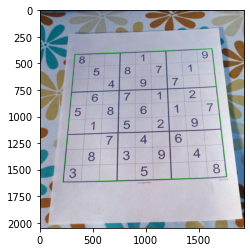

In [9]:
cv2.drawContours(img,[sudoku_contour],-1,(0,255,0),2)
plt.imshow(img)

In [10]:
def order_points(point):
    rect = np.zeros((4, 2), dtype = "float32")
    sum_ = point.sum(axis = 1)
    rect[0] = point[np.argmin(sum_)]
    rect[2] = point[np.argmax(sum_)]
    dif = np.diff(point, axis = 1)
    rect[1] = point[np.argmin(dif)]
    rect[3] = point[np.argmax(dif)]
    return rect

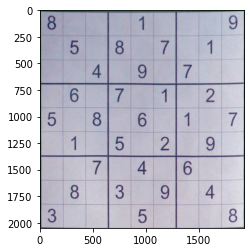

In [11]:
height , width = img.shape[:2]
src_pts = order_points(sudoku_contour.reshape(4,2))
dst_pts = np.float32([[0, 0],[width, 0],[width,height],[0,height]])
transform = cv2.getPerspectiveTransform(src_pts, dst_pts)
warp = cv2.warpPerspective(img, transform, (width, height))
plt.imshow(warp)